<a href="https://colab.research.google.com/github/Natalia-git97/Brent-Oil-Times-series/blob/main/Brent_Oil_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brent oil - linear regression, with data ordinaal



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BrentOilPrices.csv')

In [ ]:
data

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8549,"Jan 19, 2021",55.38
8550,"Jan 20, 2021",55.66
8551,"Jan 21, 2021",55.68
8552,"Jan 22, 2021",55.22


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8549,2021-01-19,55.38
8550,2021-01-20,55.66
8551,2021-01-21,55.68
8552,2021-01-22,55.22


In [ ]:
df = data
df['Date_epoch'] = pd.to_datetime(df['Date']).values.astype(np.int64)//10**6

df.set_index('Date', inplace=True)

df.head()

,Price,Date_epoch
Date,,
1987-05-20,18.63,548467200000
1987-05-21,18.45,548553600000
1987-05-22,18.55,548640000000
1987-05-25,18.60,548899200000
1987-05-26,18.63,548985600000


In [ ]:
df_train = data.loc['2006-01-01':'2018-12-31']

In [ ]:
df_train

,Price,Date_epoch
Date,,
2006-01-03,61.51,1136246400000
2006-01-04,61.25,1136332800000
2006-01-05,61.68,1136419200000
2006-01-06,62.43,1136505600000
2006-01-09,62.51,1136764800000
...,...,...
2018-12-19,55.60,1545177600000
2018-12-20,52.84,1545264000000
2018-12-21,51.93,1545350400000


In [ ]:
X = df_train['Date_epoch'].values.reshape(-1,1)
y = df_train['Price'].values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=False)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2626, 1) (2626, 1)
Test set: (657, 1) (657, 1)


In [ ]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [[1.69528994e-11]]
Intercept:  [61.78030437]


In [ ]:
#Prevendo valor de Y, baseado na eq encontrada
y_pred = model.predict(X_test)

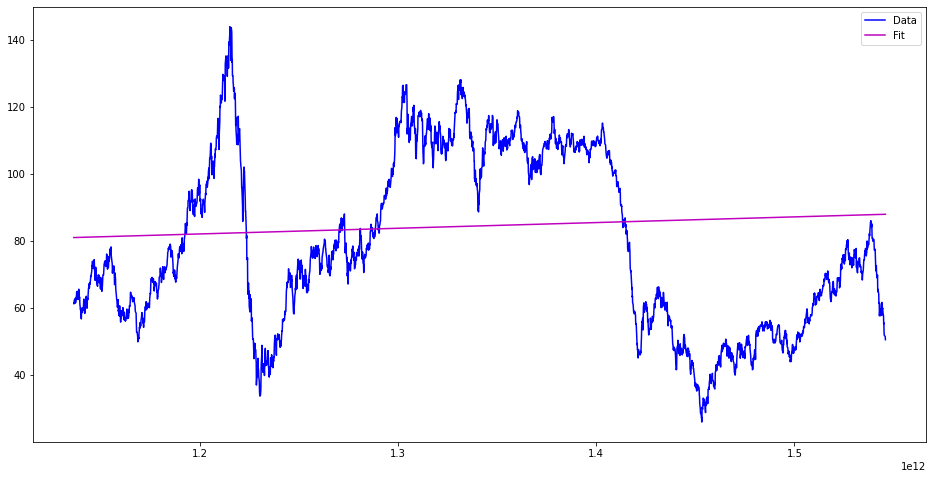

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(X, y, '-b', label = 'Data')

# sort the values of x before line plot

ax.plot(X, X*model.coef_ + model.intercept_, '-m', label = 'Fit')
ax.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 910.2381730242269
RMSE: 30.170153679161576
R2: -6.034139054373965


In [ ]:
df_pred = data.loc['2019-01-01':'2023-12-31']

In [ ]:
df_pred

,Price,Date_epoch
Date,,
2019-01-02,54.06,1546387200000
2019-01-03,53.23,1546473600000
2019-01-04,55.64,1546560000000
2019-01-07,57.10,1546819200000
2019-01-08,56.91,1546905600000
...,...,...
2021-01-19,55.38,1611014400000
2021-01-20,55.66,1611100800000
2021-01-21,55.68,1611187200000


In [ ]:
X_org = df_pred['Date_epoch'].values.reshape(-1,1)
y_org = df_pred['Price'].values.reshape(-1,1)

In [ ]:
y_pred = model.predict(X_org)

In [ ]:
y_pred

array([[87.99605095],
       [87.99751568],
       [87.99898041],
       [88.0033746 ],
       [88.00483933],
       [88.00630406],
       [88.00776879],
       [88.00923352],
       [88.01362771],
       [88.01509245],
       [88.01655718],
       [88.01802191],
       [88.01948664],
       [88.02388083],
       [88.02534556],
       [88.02681029],
       [88.02827502],
       [88.02973975],
       [88.03413394],
       [88.03559867],
       [88.0370634 ],
       [88.03852813],
       [88.03999286],
       [88.04438706],
       [88.04585179],
       [88.04731652],
       [88.04878125],
       [88.05024598],
       [88.05464017],
       [88.0561049 ],
       [88.05756963],
       [88.05903436],
       [88.06049909],
       [88.06489328],
       [88.06635801],
       [88.06782274],
       [88.06928747],
       [88.0707522 ],
       [88.0751464 ],
       [88.07661113],
       [88.07807586],
       [88.07954059],
       [88.08100532],
       [88.08539951],
       [88.08686424],
       [88

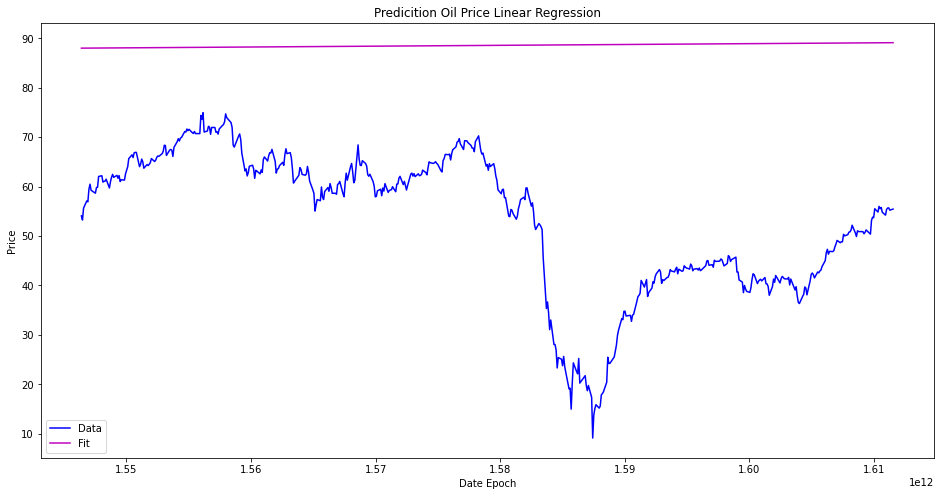

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(X_org,y_org, '-b', label = 'Data')

# sort the values of x before line plot

ax.plot(X_org, X_org*model.coef_ + model.intercept_, '-m', label = 'Fit')
plt.title('Predicition Oil Price Linear Regression')
plt.xlabel('Date Epoch')
plt.ylabel('Price')

ax.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_org, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_org, y_pred)
print("R2:", r2)

MSE: 1447.148892322167
RMSE: 38.041410230460265
R2: -6.2836694170232095
